Distance to Nearest Communicating Civilization: Problem set 2

In this problem set, we evaluate the typical distance between communicating civilizations as a
function of the number of such civilizations in the Milky Way.
(1) Assume that civilizations are located in the disk of the Galaxy. Model the galactic disk as
a cylinder with a radius of 50,000 LY and a thickness of 1,000 LY. Estimate the volume V of the
galactic disk.
(2) Assume that there are N civilizations randomly distributed in the disk, such that the volume
of space that contains one civilization is V /N . Represent each element of volume with a cube of
side d. Estimate the typical distance d between neighboring cubes for N = 10, 000 and for N = 10.

In [6]:
import math
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

In [2]:
# Estimating the volume of a cylinder.
height =1000
radius = 50000
volume = math.pi * radius**2 * height
print(f"Volume of the cylinder: {volume:.2f} cubic meters")

Volume of the cylinder: 7853981633974.48 cubic meters


Probability Density instead of deterministic estimating. It's easy to assume equal cube size and then calculate, but i want to see if statistics can give some insights on this. Use the KDTree scipy to efficiently check the nearest neighbor... I didn't reproduce the algorithm myself.

we don't know, or at least, i don't know how to, make all the cubes oriented not slanted. So let's convert the distances into a middle-ground cube length values. Let's treat each neighbor equal oppurtunities to be any vertices in a cube. then  (1+1+1+srt2 + sqr2 + sqr3 ) /7

Nearest neighbor distances: [701.19860046 494.75914431 675.07877511 213.45859826 816.73095195
 754.49604923 538.52787219 254.09393031 654.84058668 640.85999775]
number of neighbor values: 10000
Average cube length: 525.78 light years


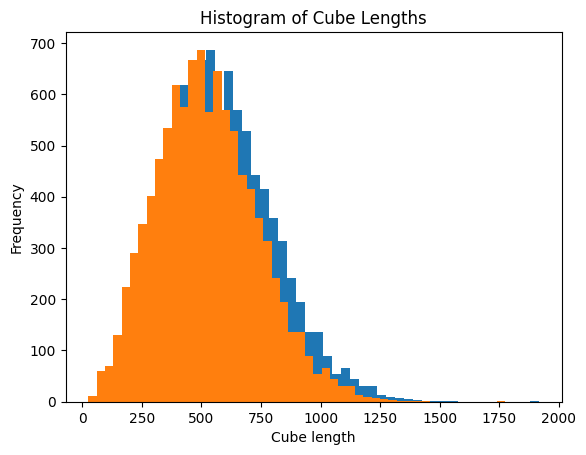

In [14]:
# generate a list of random coordinates for N points inside the cylinder. Use numpy to process

num_stars = 10000

#coords = np.random.rand(num_stars, 3)  # Random points in a cube

def generate_points_in_cylinder(N, radius=1.0, height=1.0):
    # Step 1: Random angles theta from 0 to 2π
    theta = 2 * np.pi * np.random.rand(N)

    # Step 2: Correctly scaled radius (for uniform distribution in circle)
    r = radius * np.sqrt(np.random.rand(N))

    # Step 3: z from uniform height distribution
    z = height * (np.random.rand(N) - 0.5)  # center at z = 0

    # Step 4: Convert polar (r, theta) to cartesian (x, y)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Combine into (N, 3) array
    return np.vstack((x, y, z)).T

coords = generate_points_in_cylinder(num_stars, radius=radius, height=height)

neighbors = KDTree(coords)


# For each point, get its nearest neighbor
distances, indices = neighbors.query(coords, k=2)

# Skip self (index 0), use the second column for actual neighbor distances
nearest_neighbor_distances = distances[:, 1]
print(f"Nearest neighbor distances: {nearest_neighbor_distances[:10]}")  # Print first 10 distances
print("number of neighbor values:", len(nearest_neighbor_distances))

plt.hist(nearest_neighbor_distances, bins=50)
plt.xlabel('Distance to nearest neighbor')
plt.ylabel('Frequency') 

# convert those distances into cube length d
cube_possibilities = (1+1+1+ 2*math.sqrt(2) +  math.sqrt(3) ) /7

cube_length = nearest_neighbor_distances / cube_possibilities

plt.hist(cube_length, bins=50)
plt.xlabel('Cube length')
plt.ylabel('Frequency')
plt.title('Histogram of Cube Lengths')

average_cube_length = np.mean(cube_length)
print(f"Average cube length: {average_cube_length:.2f} light years")

Nearest neighbor distances: [0.33635823 0.45311302 0.2686615  0.37809269 0.44867541 0.13424528
 0.2686615  0.13424528 0.37809269 0.38177903]
number of neighbor values: 10
Average cube length: 0.29 light years


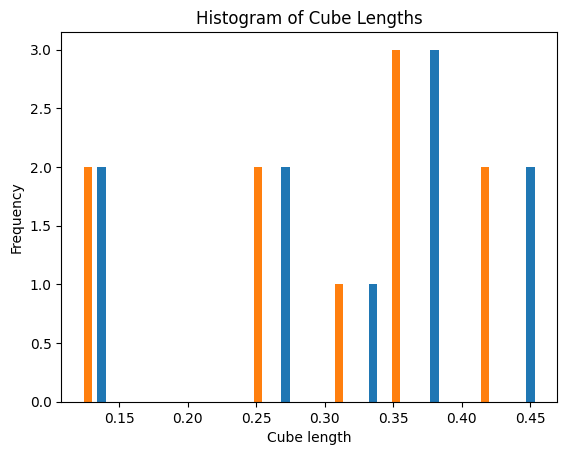

In [15]:
# generate a list of random coordinates for N points inside the cylinder. Use numpy to process

num_stars = 10
coords = np.random.rand(num_stars,3)
neighbors = KDTree(coords)

# For each point, get its nearest neighbor
distances, indices = neighbors.query(coords, k=2)

# Skip self (index 0), use the second column for actual neighbor distances
nearest_neighbor_distances = distances[:, 1]
print(f"Nearest neighbor distances: {nearest_neighbor_distances[:10]}")  # Print first 10 distances
print("number of neighbor values:", len(nearest_neighbor_distances))

plt.hist(nearest_neighbor_distances, bins=50)
plt.xlabel('Distance to nearest neighbor')
plt.ylabel('Frequency') 

# convert those distances into cube length d
cube_possibilities = (1+1+1+ 2*math.sqrt(2) +  math.sqrt(3) ) /7

cube_length = nearest_neighbor_distances / cube_possibilities

plt.hist(cube_length, bins=50)
plt.xlabel('Cube length')
plt.ylabel('Frequency')
plt.title('Histogram of Cube Lengths')

average_cube_length = np.mean(cube_length)
print(f"Average cube length: {average_cube_length:.2f} light years")